### Global Drought Analysis 

In [107]:
import pandas as pd 
import numpy as np
from simpledbf import Dbf5
import geopandas as gpd
import linecache
import matplotlib.pyplot as plt

### Global Drought Mortality Risks and Distribution dataset in NASA

    Abstract:
*Global Drought Mortality Risks and Distribution is a 2.5 minute grid of global drought mortality risks. Gridded Population of the World, Version 3 (GPWv3) data provide a baseline estimation of population per grid cell from which to estimate potential mortality risks due to drought hazard. Mortality loss estimates per hazard event are calculated using regional, hazard-specific mortality records of the Emergency Events Database (EM-DAT) that span the 20 years between 1981 and 2000. Data regarding the frequency and distribution of drought hazard are obtained from the Global Drought Hazard Frequency and Distribution data set. In order to more accurately reflect the confidence associated with the data and procedures, the potential mortality estimate range is classified into deciles, 10 classes of increasing risk with an approximately equal number of grid cells per class, producing a relative estimate of drought-based mortality risks. This data set is the result of collaboration among the Columbia University Center for Hazards and Risk Research (CHRR), International Bank for Reconstruction and Development/The World Bank, and Columbia University Center for International Earth Science Information Network (CIESIN).*

Source: http://sedac.ciesin.columbia.edu/data/set/ndh-drought-mortality-risks-distribution

Dataset includes 4 files:
 - gddrgmrt.zip
 - gddrgmrt.dbf
 - gddrgmrt.asc
 - gddrgmrt.prj

In [108]:
# Opening and coverting to dbf to pandas dataframe
dbf = Dbf5('datasets/gddrgmrt/gddrgmrt.dbf')
df = dbf.to_dataframe()

In [133]:
df.head(10)

,VALUE,COUNT,POP,GDPVALUE,AGVALUE,AREAKM,TRANSKM
0,1,172346,4.625890e+07,3.721354e+11,4.680761e+10,3351898.0,238678.3
1,2,141586,6.830056e+07,4.505782e+11,2.798854e+10,2619113.0,186475.5
2,3,153761,1.353855e+08,6.539678e+11,4.045008e+10,2827104.0,190959.6
3,4,154762,2.882802e+08,9.655730e+11,8.178319e+10,2907281.0,214368.3
4,5,155121,5.323856e+08,1.711740e+12,1.202621e+11,2938750.0,249740.6
5,6,155292,1.036418e+09,3.083705e+12,1.413602e+11,2955266.0,275095.3
6,7,155495,6.094063e+08,1.910199e+12,6.716410e+10,3139840.0,207439.3
7,8,155521,1.217183e+08,3.433403e+11,1.051247e+10,3250137.0,182291.1
8,9,155197,1.021101e+08,2.442823e+11,1.254732e+10,3246223.0,201296.3
9,10,155422,3.494675e+08,4.979573e+11,2.580002e+10,3249213.0,235069.7


In [110]:
type(df)

pandas.core.frame.DataFrame

In [111]:
#checking for nans
df.isna().sum()

VALUE       0
COUNT       0
POP         0
GDPVALUE    0
AGVALUE     0
AREAKM      0
TRANSKM     0
dtype: int64

In [112]:
df.shape

(10, 7)

Ten classes for the relative esstimate of drought-based mortality risk and its summary features

In [113]:
# Summary statistics
df.describe()

,VALUE,COUNT,POP,GDPVALUE,AGVALUE,AREAKM,TRANSKM
count,10.00000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,5.50000,155450.300000,3.289731e+08,1.023348e+12,5.746756e+10,3.048482e+06,218141.400000
std,3.02765,7312.215351,3.166401e+08,9.275278e+11,4.492473e+10,2.344025e+05,30532.204991
min,1.00000,141586.000000,4.625890e+07,2.442823e+11,1.051247e+10,2.619113e+06,182291.100000
25%,3.25000,154851.750000,1.070122e+08,3.917461e+11,2.634715e+10,2.915148e+06,193543.775000
50%,5.50000,155244.500000,2.118328e+08,5.759626e+11,4.362884e+10,3.047553e+06,210903.800000
75%,7.75000,155476.750000,4.866561e+08,1.525198e+12,7.812842e+10,3.248466e+06,237776.150000
max,10.00000,172346.000000,1.036418e+09,3.083705e+12,1.413602e+11,3.351898e+06,275095.300000


In [114]:
# Opening raster file and skipping the first 6 roas of header
myArray = np.loadtxt("datasets/gddrgmrt/gddrgmrt.asc", skiprows=6)

In [115]:
type(myArray)

numpy.ndarray

Following block of code adapted from: Geospatial Python by Joel Lawhead on Dec. 2020. Available at: 
http://geospatialpython.com/2013/12/python-and-elevation-data-ascii-grid.html

In [116]:
# Assigning a header variable from the raster file  
header = "ncols     %s\n" % myArray.shape[1]
header += "nrows    %s\n" % myArray.shape[0]
header += "xllcorner     -179.9984\n"
header += "yllcorner     -58.015072\n"
header += "cellsize      0.0417\n"
header += "NODATA_value  -9999\n"

np.savetxt("datasets/myGrid.asc", myArray, \
header=header, fmt="%1.2f")

In [117]:
# For proper file closure 
with open("datasets/myGrid.asc", "w") as f:
    f.write(header)
    np.savetxt(f, myArray, fmt="%1.2f")

In [118]:
# Checking my lines
line1 = linecache.getline("datasets/myGrid.asc", 1)
line1

'ncols     8633\n'

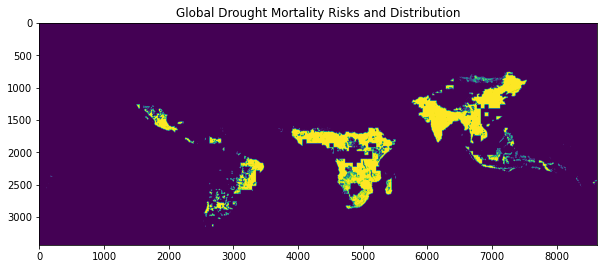

<Figure size 432x288 with 0 Axes>

In [119]:
# Plotting array 
plt.figure(figsize=(10,10))
plt.imshow(myArray)
plt.title('Global Drought Mortality Risks and Distribution')
plt.show()
plt.savefig('globalDroughtRisk')

In [120]:
myArray

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]])

In [121]:
myArray.shape

(3430, 8633)

In [122]:
# New array with no data value to nan value 
newArray = myArray[myArray == -9999] = [np.nan]

In [123]:
# Dropping nan values in new array 
newArray = myArray[~np.isnan(myArray)]

In [124]:
# Sanity check
newArray

array([2., 2., 2., ..., 1., 1., 1.])

In [125]:
newArray.shape

(1554503,)

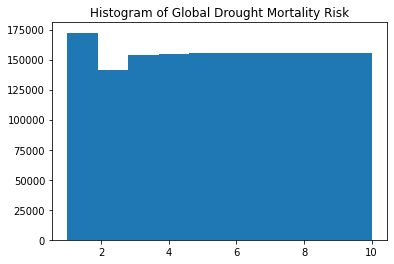

In [126]:
# Distribution of classes 
plt.hist(newArray)
plt.title('Histogram of Global Drought Mortality Risk')
plt.show()

Approximately equal number of gridcells per class with a notable exception between class 1 and class 2 (unsure why, need further investigation from data origin). 

<AxesSubplot:xlabel='VALUE'>

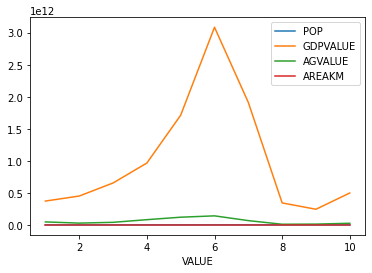

In [127]:
# Quick visual 
df.plot(x='VALUE', y=['POP','GDPVALUE','AGVALUE', 'AREAKM'])

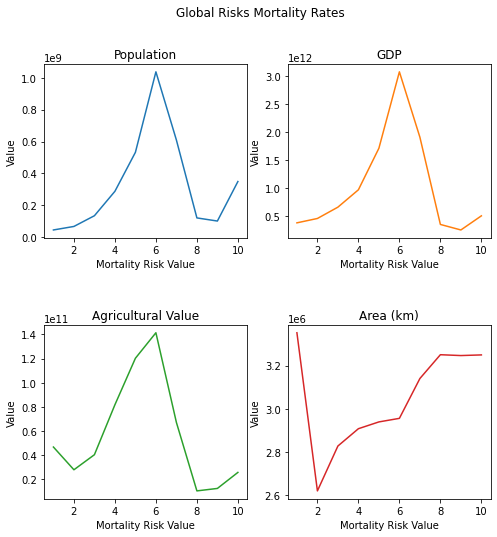

In [128]:
# Plotting subplots together
fig, axs = plt.subplots(2,2 , figsize=(8, 8))
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Global Risks Mortality Rates')

axs[0,0].plot(df['VALUE'], df['POP'])
axs[0,0].set_title('Population')

axs[0,1].plot(df['VALUE'], df['GDPVALUE'], 'tab:orange')
axs[0,1].set_title('GDP')

axs[1,0].plot(df['VALUE'], df['AGVALUE'], 'tab:green')
axs[1,0].set_title('Agricultural Value')

axs[1,1].plot(df['VALUE'], df['AREAKM'], 'tab:red')
axs[1,1].set_title('Area (km)')

for ax in axs.flat:
    ax.set(xlabel='Mortality Risk Value', 
           ylabel='Value')


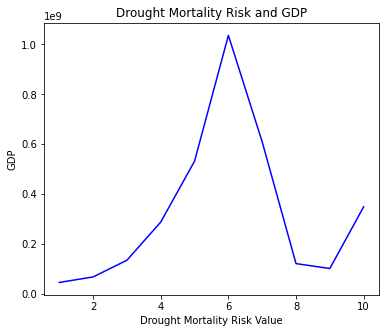

In [129]:
# Plotting separately for each variable 
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(df['VALUE'], df['POP'],
       color='blue')

ax.set(xlabel="Drought Mortality Risk Value",
       ylabel="GDP",
       title="Drought Mortality Risk and GDP")

plt.show()

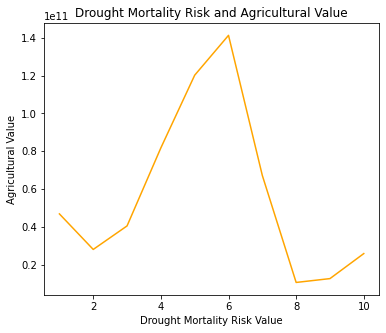

In [130]:
# Plotting separately for each variable 
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(df['VALUE'], df['AGVALUE'],
       color='orange')

ax.set(xlabel="Drought Mortality Risk Value",
       ylabel="Agricultural Value",
       title="Drought Mortality Risk and Agricultural Value")

plt.show()

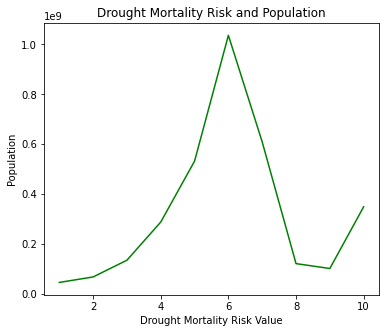

In [131]:
# Plotting separately for each variable 
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(df['VALUE'], df['POP'],
       color='green')

ax.set(xlabel="Drought Mortality Risk Value",
       ylabel="Population",
       title="Drought Mortality Risk and Population")

plt.show()

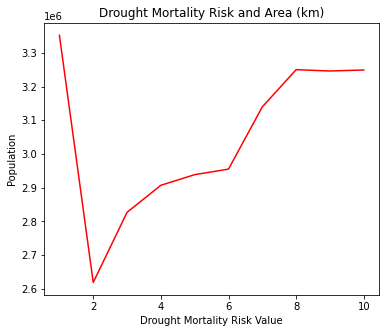

In [132]:
# Plotting separately for each variable 
fig, ax = plt.subplots(figsize=(6, 5))

ax.plot(df['VALUE'], df['AREAKM'],
       color='red')

ax.set(xlabel="Drought Mortality Risk Value",
       ylabel="Population",
       title="Drought Mortality Risk and Area (km)")

plt.show()

## References:

Data: 

Center for Hazards and Risk Research - CHRR - Columbia University, Center for International Earth Science Information Network - CIESIN - Columbia University, and International Bank for Reconstruction and Development - The World Bank. 2005. Global Drought Mortality Risks and Distribution. Palisades, NY: NASA Socioeconomic Data and Applications Center (SEDAC). http://dx.doi.org/10.7927/H4R49NQV. Accessed DAY MONTH YEAR.

Dilley, M., R.S. Chen, U. Deichmann, A.L. Lerner-Lam, M. Arnold, J. Agwe, P. Buys, O. Kjekstad, B. Lyon, and G. Yetman. 2005. Natural Disaster Hotspots: A Global Risk Analysis. Disaster Risk Management Series No. 5. Washington, D.C.: The World Bank. http://go.worldbank.org/PT8XJZW3K0.




